### Calculation of Carbon contract for Difference (CCfD)-price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
## Manually Input varibles 
output_file_name = 'CO2_prices.xlsx'

# fossil based methanol data
energy_density = 19.7*10**9                               # J/t  (source: https://ebookcentral.proquest.com/lib/kbhnhh-ebooks/detail.action?docID=5116604)   
co2_indstr_high = 2.863                                   # kg*CO2/kg*MeOH   (source: https://www.sciencedirect.com/science/article/pii/S0360319922002415)
co2_indstr_low = 2.05                                     # kg*CO2/kg*MeOH   (source: https://www.methanol.org/wp-content/uploads/2022/01/CARBON-FOOTPRINT-OF-METHANOL-PAPER_1-31-22.pdf)
co2_indstr_perJ = 103 * 10**(-9)                        # kg*CO2/J  (source: https://www.methanol.org/wp-content/uploads/2022/01/CARBON-FOOTPRINT-OF-METHANOL-PAPER_1-31-22.pdf)

# Average emissions of grid power
avg_elctr_emissions_2019 = 372/(10**6)                    # kg Co2/(Wh electricity)  (source: https://energinet.dk/media/1duf3x0o/19_07249-24-generel-eldeklaration-historik-10536640_5986882_0.xlsx)
avg_elctr_emissions_2020 = 478.5/(10**6)                  # kg Co2/(Wh electricity)  (source: https://energinet.dk/media/1duf3x0o/19_07249-24-generel-eldeklaration-historik-10536640_5986882_0.xlsx)
avg_elctr_emissions_2021 = 411.5/(10**6)                  # kg Co2/(Wh electricity)  (source: https://energinet.dk/media/1duf3x0o/19_07249-24-generel-eldeklaration-historik-10536640_5986882_0.xlsx)
avg_elctr_emissions_2022 = 432.0/(10**6)                  # kg Co2/(Wh electricity)  (source: https://energinet.dk/media/1duf3x0o/19_07249-24-generel-eldeklaration-historik-10536640_5986882_0.xlsx)
avg_elctr_emissions_2023 = 499.8/(10**6)                  # kg Co2/(Wh electricity)  (source: https://energinet.dk/media/1duf3x0o/19_07249-24-generel-eldeklaration-historik-10536640_5986882_0.xlsx)


# Power distribution within the hub for years 2019-2023
Production_PV_2019 = 378628                              # MWh (own result)
El_from_grid_2019 = 193797.8                             # MWh (own result)
El_to_grid_2019 = 246822.1                               # MWh (own result)

Production_PV_2020 = 370274.4919                         # MWh (own result)
El_from_grid_2020 = 197283.7823                          # MWh (own result)
El_to_grid_2020 = 241636.7431                            # MWh (own result)

Production_PV_2021 = 376423.2522                         # MWh (own result)
El_from_grid_2021 = 197283.7823                          # MWh (own result)
El_to_grid_2021 = 252842.2819                            # MWh (own result)

Production_PV_2022 = 380911.0254                         # MWh (own result)
El_from_grid_2022 = 201316.4926                          # MWh (own result)
El_to_grid_2022 = 256792.6621                            # MWh (own result)

Production_PV_2023 = 360342.6432                         # MWh (own result)
El_from_grid_2023 = 193838.1675                          # MWh (own result)
El_to_grid_2023 = 228661.1283                            # MWh (own result)

# Yearly methanol demand in hub
demand_yearly_t = 32000                                  # t/a    (own result)

# Costs in €/t
costs_hub_2019 = 1380.613522                             # €/t    (own result)
costs_hub_2020 = 1365.18198476859                        # €/t    (own result)
costs_hub_2021 = 1724.62329663426                        # €/t    (own result)
costs_hub_2022 = 2351.19124162373                        # €/t    (own result)
costs_hub_2023 = 1610.28329877091                        # €/t    (own result)
costs_hub_2050 = 927.579593165269                        # €/t    (own result)

costs_hub_2019_PV = 1086.150826                          # €/t    (own result)
costs_hub_2020_PV = 1170.39483985697                     # €/t    (own result)
costs_hub_2021_PV = 1089.55745275071                     # €/t    (own result)
costs_hub_2022_PV = 452.9082392                          # €/t    (own result)
costs_hub_2023_PV = 1039.03136462987                     # €/t    (own result)
costs_hub_2050_PV = 721.0076669                          # €/t    (own result)

# Costs industrial methanol 2019-2023   
costs_indstr_methanol2019 = 370                          # $/t    (source: https://www.irena.org/-/media/Files/IRENA/Agency/Publication/2021/Jan/IRENA_Innovation_Renewable_Methanol_2021.pdf)
costs_indstr_methanol2020 = 205                          # $/t    (source: https://www.irena.org/-/media/Files/IRENA/Agency/Publication/2021/Jan/IRENA_Innovation_Renewable_Methanol_2021.pdf)
costs_indstr_methanol2021 = 395                          # $/t    (source: https://shipandbunker.com/prices/emea/nwe/nl-rtm-rotterdam)
costs_indstr_methanol2022 = 399                          # $/t    (source: https://shipandbunker.com/prices/emea/nwe/nl-rtm-rotterdam)
costs_indstr_methanol2023 = 321.5                        # $/t    (source: https://shipandbunker.com/prices/emea/nwe/nl-rtm-rotterdam)
exchange_rate2019 = 0.8932                               # €/$    (source: https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/eurofxref-graph-usd.en.html)
exchange_rate2020 = 0.8602                               # €/$    (source: https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/eurofxref-graph-usd.en.html)
exchange_rate2021 = 0.8945                               # €/$    (source: https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/eurofxref-graph-usd.en.html)
exchange_rate2022 = 0.9371                               # €/$    (source: https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/eurofxref-graph-usd.en.html)
exchange_rate2023 = 0.9248                               # €/$    (source: https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/eurofxref-graph-usd.en.html)


# European allowances 2019-2023
avg_EUA_2019 = 24.723125                                 # €/(t*CO2-eq)  (source: https://icapcarbonaction.com/en/ets-prices)
avg_EUA_2020 = 24.38660287                               # €/(t*CO2-eq)  (source: https://icapcarbonaction.com/en/ets-prices)
avg_EUA_2021 = 54.15156951                               # €/(t*CO2-eq)  (source: https://icapcarbonaction.com/en/ets-prices)
avg_EUA_2022 = 80.18404545                               # €/(t*CO2-eq)  (source: https://icapcarbonaction.com/en/ets-prices)
avg_EUA_2023 = 83.59650224                               # €/(t*CO2-eq)  (source: https://icapcarbonaction.com/en/ets-prices)

EUA_2050_dkk = 1652                                      # DKK/(t*CO2-eq) (source: https://fm.dk/media/4tkj2o4w/noegletalskatalog_juni-2024.pdf)
exchange_rate = 0.1338
EUA_2050_EUR = EUA_2050_dkk*exchange_rate


In [20]:
## Further calculations

# Co2 equivalent fossil based methanol production 
co2_industr_perWh = co2_indstr_perJ*3600                                             # kg*CO2/Wh MeOH

# Emissions per Wh
avg_emissions_indstr_methanol = co2_industr_perWh                                    # kg*CO2/Wh MeOH

# Electricity used for production, PV share and used grid electricity in production 
#2019
El_used2019 = El_from_grid_2019+Production_PV_2019- El_to_grid_2019                  # MWh 
PV_used_rel2019 = (Production_PV_2019-El_to_grid_2019)/El_used2019                   # % 
el_demand_grid_2019 = El_from_grid_2019*(1-PV_used_rel2019)                          # MWh

#2020
El_used2020 = El_from_grid_2020+Production_PV_2020- El_to_grid_2020                  # MWh 
PV_used_rel2020 = (Production_PV_2020-El_to_grid_2020)/El_used2020                   # % 
el_demand_grid_2020 = El_from_grid_2020*(1-PV_used_rel2020)                          # MWh

#2021
El_used2021 = El_from_grid_2021+Production_PV_2021- El_to_grid_2021                   # MWh 
PV_used_rel2021 = (Production_PV_2021-El_to_grid_2021)/El_used2021                    # % 
el_demand_grid_2021 = El_from_grid_2021*(1-PV_used_rel2021)                           # MWh

#2022
El_used2022 = El_from_grid_2022+Production_PV_2022- El_to_grid_2022                   # MWh 
PV_used_rel2022 = (Production_PV_2022-El_to_grid_2022)/El_used2022                    # % 
el_demand_grid_2022 = El_from_grid_2022*(1-PV_used_rel2022)                           # MWh

#2023
El_used2023 = El_from_grid_2023+Production_PV_2023- El_to_grid_2023                   # MWh 
PV_used_rel2023 = (Production_PV_2023-El_to_grid_2023)/El_used2023                    # % 
el_demand_grid_2023 = El_from_grid_2023*(1-PV_used_rel2023)                           # MWh


# Electricity taken from the grid 
#2019
grid_electricity_2019 = el_demand_grid_2019 *10**6                                    # Wh
#2020
grid_electricity_2020 = el_demand_grid_2020 *10**6                                    # Wh
#2021
grid_electricity_2021 = el_demand_grid_2021 *10**6                                    # Wh
#2022
grid_electricity_2022 = el_demand_grid_2022 *10**6                                    # Wh
#2023
grid_electricity_2023 = el_demand_grid_2023 *10**6                                    # Wh 

# Methanol demand  in hub (yearly, in Wh) 
demand_yearly_Wh = (energy_density*demand_yearly_t)/3600                              # Wh/a

# Emissions per year 
emissions_hub_2019 = grid_electricity_2019*avg_elctr_emissions_2019/1000              # t Co2
emissions_hub_2020 = grid_electricity_2020*avg_elctr_emissions_2020/1000              # t Co2
emissions_hub_2021 = grid_electricity_2021*avg_elctr_emissions_2021/1000              # t Co2
emissions_hub_2022 = grid_electricity_2022*avg_elctr_emissions_2022/1000              # t Co2
emissions_hub_2023 = grid_electricity_2023*avg_elctr_emissions_2023/1000              # t Co2
emissions_indstrM_low = demand_yearly_t*co2_indstr_low                                # t Co2
emissions_indstrM_high = demand_yearly_t*co2_indstr_high                              # t Co2
emissions_hub_2050 = 0


# Emissions per tonne Methanol
emissions_per_tonne_2019 = emissions_hub_2019/demand_yearly_t                         # t*Co2/t*MeOH
emissions_per_tonne_2020 = emissions_hub_2020/demand_yearly_t                         # t*Co2/t*MeOH
emissions_per_tonne_2021 = emissions_hub_2021/demand_yearly_t                         # t*Co2/t*MeOH
emissions_per_tonne_2022 = emissions_hub_2022/demand_yearly_t                         # t*Co2/t*MeOH 
emissions_per_tonne_2023 = emissions_hub_2023/demand_yearly_t                         # t*Co2/t*MeOH

# Costs for yearly demand
#without PV
ym_costs_2019 = costs_hub_2019*demand_yearly_t                                        # €
ym_costs_2020 = costs_hub_2020*demand_yearly_t                                        # €
ym_costs_2021 = costs_hub_2021*demand_yearly_t                                        # €
ym_costs_2022 = costs_hub_2022*demand_yearly_t                                        # €
ym_costs_2023 = costs_hub_2023*demand_yearly_t                                        # €
ym_costs_2050 = costs_hub_2050*demand_yearly_t                                        # €
#with PV
ym_costs_2019_PV = costs_hub_2019_PV*demand_yearly_t                                  # €
ym_costs_2020_PV = costs_hub_2020_PV*demand_yearly_t                                  # €
ym_costs_2021_PV = costs_hub_2021_PV*demand_yearly_t                                  # €
ym_costs_2022_PV = costs_hub_2022_PV*demand_yearly_t                                  # €
ym_costs_2023_PV = costs_hub_2023_PV*demand_yearly_t                                  # €
ym_costs_2050_PV = costs_hub_2050_PV*demand_yearly_t                                  # €
#conventional_PV
ym_costs_indstr2019 = costs_indstr_methanol2019*exchange_rate2019*demand_yearly_t     # €
ym_costs_indstr2020 = costs_indstr_methanol2020*exchange_rate2020*demand_yearly_t     # €
ym_costs_indstr2021 = costs_indstr_methanol2021*exchange_rate2021*demand_yearly_t     # €
ym_costs_indstr2022 = costs_indstr_methanol2022*exchange_rate2022*demand_yearly_t     # €
ym_costs_indstr2023 = costs_indstr_methanol2023*exchange_rate2023*demand_yearly_t     # €
ym_costs_indstr2050 = ym_costs_indstr2023                                             # €

In [ ]:
# Calculations of neccessary carbon prices   (extra costs per saved tonne of co2)
# without PV

# Comparison with lower co2 emissions of industrial methanol
CP2019l = (ym_costs_2019-ym_costs_indstr2019)/(emissions_indstrM_low-emissions_hub_2019)   # €/t*Co2
CP2020l = (ym_costs_2020-ym_costs_indstr2020)/(emissions_indstrM_low-emissions_hub_2020)   # €/t*Co2
CP2021l = (ym_costs_2021-ym_costs_indstr2021)/(emissions_indstrM_low-emissions_hub_2021)   # €/t*Co2
CP2022l = (ym_costs_2022-ym_costs_indstr2022)/(emissions_indstrM_low-emissions_hub_2022)   # €/t*Co2
CP2023l = (ym_costs_2023-ym_costs_indstr2023)/(emissions_indstrM_low-emissions_hub_2023)   # €/t*Co2
CP2050l = (ym_costs_2050-ym_costs_indstr2050)/(emissions_indstrM_low-emissions_hub_2050)   # €/t*Co2

# Comparison with higher co2 emissions of industrial methanol 
CP2019h = (ym_costs_2019-ym_costs_indstr2019)/(emissions_indstrM_high-emissions_hub_2019)   # €/t*Co2
CP2020h = (ym_costs_2020-ym_costs_indstr2020)/(emissions_indstrM_high-emissions_hub_2020)   # €/t*Co2
CP2021h = (ym_costs_2021-ym_costs_indstr2021)/(emissions_indstrM_high-emissions_hub_2021)   # €/t*Co2
CP2022h = (ym_costs_2022-ym_costs_indstr2022)/(emissions_indstrM_high-emissions_hub_2022)   # €/t*Co2
CP2023h = (ym_costs_2023-ym_costs_indstr2023)/(emissions_indstrM_high-emissions_hub_2023)   # €/t*Co2
CP2050h = (ym_costs_2050-ym_costs_indstr2050)/(emissions_indstrM_high-emissions_hub_2050)   # €/t*Co2

# Comparison in case of purely green E-Methanol with lower co2 industrial methanol
CP2019l_green = (ym_costs_2019-ym_costs_indstr2019)/(emissions_indstrM_low)   # €/t*Co2
CP2020l_green = (ym_costs_2020-ym_costs_indstr2020)/(emissions_indstrM_low)   # €/t*Co2
CP2021l_green = (ym_costs_2021-ym_costs_indstr2021)/(emissions_indstrM_low)   # €/t*Co2
CP2022l_green = (ym_costs_2022-ym_costs_indstr2022)/(emissions_indstrM_low)   # €/t*Co2
CP2023l_green = (ym_costs_2023-ym_costs_indstr2023)/(emissions_indstrM_low)   # €/t*Co2
CP2050l_green = (ym_costs_2050-ym_costs_indstr2050)/(emissions_indstrM_low)   # €/t*Co2

# Comparison in case of purely green E-Methanol with higher co2 industrial methanol
CP2019h_green = (ym_costs_2019-ym_costs_indstr2019)/(emissions_indstrM_high)   # €/t*Co2
CP2020h_green = (ym_costs_2020-ym_costs_indstr2020)/(emissions_indstrM_high)   # €/t*Co2
CP2021h_green = (ym_costs_2021-ym_costs_indstr2021)/(emissions_indstrM_high)   # €/t*Co2
CP2022h_green = (ym_costs_2022-ym_costs_indstr2022)/(emissions_indstrM_high)   # €/t*Co2
CP2023h_green = (ym_costs_2023-ym_costs_indstr2023)/(emissions_indstrM_high)   # €/t*Co2
CP2050h_green = (ym_costs_2050-ym_costs_indstr2050)/(emissions_indstrM_high)   # €/t*Co2

In [16]:
print("Carbon price compared to methanol with lower emission:", CP2019l, CP2020l,CP2021l,CP2022l,CP2023l, CP2050l)
print("Carbon price compared to methanol with higher emission:", CP2019h, CP2020h,CP2021h,CP2022h,CP2023h, CP2050h)
print("Carbon price compared to methanol with lower emission (green case):", CP2019l_green, CP2020l_green,CP2021l_green,CP2022l_green,CP2023l_green, CP2050l_green)
print("Carbon price compared to methanol with higher emission (green_case):", CP2019h_green, CP2020h_green,CP2021h_green,CP2022h_green,CP2023h_green, CP2050h_green)


print("CO2-equivalents:",emissions_per_tonne_2019,emissions_per_tonne_2020,emissions_per_tonne_2021,emissions_per_tonne_2022,emissions_per_tonne_2023,co2_indstr_low,co2_indstr_high)

Carbon price compared to methanol with lower emission: 1480.9646598564343 4497.589715525152 1573.3550399943522 309.0507186566104 3141.8592485727254 307.4374634146342
Carbon price compared to methanol with higher emission: 689.9283966043414 1103.5069858689012 591.7874290397547 96.43803661325786 732.5664855567891 220.13510303877052
Carbon price compared to methanol with lower emission (green case): 512.2583034146342 579.9214634146341 376.19146341463414 55.59370731707316 378.86185365853663 307.4374634146342
Carbon price compared to methanol with higher emission (green_case): 366.79340621725464 415.24240307369894 269.36517638840377 39.80688089416695 271.27726161369196 220.13510303877052
CO2-equivalents: 1.3409152051597233 1.7856719765041558 1.5598420379402933 1.6812349620301965 1.802800256614671 2.05 2.863


In [30]:
# Create a dictionary to store the data
data_without_PV = {
    "Year": ["2019", "2020", "2021", "2022", "2023", "2050"],
    "Carbon Price Lower Emission": [CP2019l, CP2020l, CP2021l, CP2022l, CP2023l, CP2050l],
    "Carbon Price Higher Emission": [CP2019h, CP2020h, CP2021h, CP2022h, CP2023h, CP2050h],
    "Carbon Price Lower Emission (Green Case)": [CP2019l_green, CP2020l_green, CP2021l_green, CP2022l_green, CP2023l_green, CP2050l_green],
    "Carbon Price Higher Emission (Green Case)": [CP2019h_green, CP2020h_green, CP2021h_green, CP2022h_green, CP2023h_green, CP2050h_green],
    "CO2 Equivalents": [emissions_per_tonne_2019, emissions_per_tonne_2020, emissions_per_tonne_2021, emissions_per_tonne_2022, emissions_per_tonne_2023, 0]
}

# Convert the dictionary into a pandas DataFrame
df_values_without_PV = pd.DataFrame(data_without_PV)
df_values_without_PV

,Year,Carbon Price Lower Emission,Carbon Price Higher Emission,Carbon Price Lower Emission (Green Case),Carbon Price Higher Emission (Green Case),CO2 Equivalents
0,2019,1480.964660,689.928397,512.258303,366.793406,1.340915
1,2020,4497.597224,1103.508828,579.922432,415.243096,1.785672
2,2021,2797.660964,1052.286704,668.924779,478.971637,1.559842
3,2022,5361.919212,1673.165374,964.530898,690.635118,1.681235
4,2023,5311.332774,1238.408240,640.468341,458.595913,1.802800
5,2050,307.442143,220.138454,307.442143,220.138454,0.000000


In [22]:
# Calculations of neccessary carbon prices   (extra costs per saved tonne of co2)
# with PV

# Comparison with lower co2 emissions of industrial methanol
CP2019l_PV = (ym_costs_2019_PV-ym_costs_indstr2019)/(emissions_indstrM_low-emissions_hub_2019)   # €/t*Co2
CP2020l_PV = (ym_costs_2020_PV-ym_costs_indstr2020)/(emissions_indstrM_low-emissions_hub_2020)   # €/t*Co2
CP2021l_PV = (ym_costs_2021_PV-ym_costs_indstr2021)/(emissions_indstrM_low-emissions_hub_2021)   # €/t*Co2
CP2022l_PV = (ym_costs_2022_PV-ym_costs_indstr2022)/(emissions_indstrM_low-emissions_hub_2022)   # €/t*Co2
CP2023l_PV = (ym_costs_2023_PV-ym_costs_indstr2023)/(emissions_indstrM_low-emissions_hub_2023)   # €/t*Co2
CP2050l_PV = (ym_costs_2050_PV-ym_costs_indstr2050)/(emissions_indstrM_low-emissions_hub_2050)   # €/t*Co2

# Comparison with higher co2 emissions of industrial methanol 
CP2019h_PV = (ym_costs_2019_PV-ym_costs_indstr2019)/(emissions_indstrM_high-emissions_hub_2019)   # €/t*Co2
CP2020h_PV = (ym_costs_2020_PV-ym_costs_indstr2020)/(emissions_indstrM_high-emissions_hub_2020)   # €/t*Co2
CP2021h_PV = (ym_costs_2021_PV-ym_costs_indstr2021)/(emissions_indstrM_high-emissions_hub_2021)   # €/t*Co2
CP2022h_PV = (ym_costs_2022_PV-ym_costs_indstr2022)/(emissions_indstrM_high-emissions_hub_2022)   # €/t*Co2
CP2023h_PV = (ym_costs_2023_PV-ym_costs_indstr2023)/(emissions_indstrM_high-emissions_hub_2023)   # €/t*Co2
CP2050h_PV = (ym_costs_2050_PV-ym_costs_indstr2050)/(emissions_indstrM_high-emissions_hub_2050)   # €/t*Co2

# Comparison in case of pur_PVely green E-Methanol with lower co2 industrial methanol
CP2019l_green_PV = (ym_costs_2019_PV-ym_costs_indstr2019)/(emissions_indstrM_low)   # €/t*Co2
CP2020l_green_PV = (ym_costs_2020_PV-ym_costs_indstr2020)/(emissions_indstrM_low)   # €/t*Co2
CP2021l_green_PV = (ym_costs_2021_PV-ym_costs_indstr2021)/(emissions_indstrM_low)   # €/t*Co2
CP2022l_green_PV = (ym_costs_2022_PV-ym_costs_indstr2022)/(emissions_indstrM_low)   # €/t*Co2
CP2023l_green_PV = (ym_costs_2023_PV-ym_costs_indstr2023)/(emissions_indstrM_low)   # €/t*Co2
CP2050l_green_PV = (ym_costs_2050_PV-ym_costs_indstr2050)/(emissions_indstrM_low)   # €/t*Co2

# Comparison in case of purely green E-Methanol with higher co2 industrial methanol
CP2019h_green_PV = (ym_costs_2019_PV-ym_costs_indstr2019)/(emissions_indstrM_high)   # €/t*Co2
CP2020h_green_PV = (ym_costs_2020_PV-ym_costs_indstr2020)/(emissions_indstrM_high)   # €/t*Co2
CP2021h_green_PV = (ym_costs_2021_PV-ym_costs_indstr2021)/(emissions_indstrM_high)   # €/t*Co2
CP2022h_green_PV = (ym_costs_2022_PV-ym_costs_indstr2022)/(emissions_indstrM_high)   # €/t*Co2
CP2023h_green_PV = (ym_costs_2023_PV-ym_costs_indstr2023)/(emissions_indstrM_high)   # €/t*Co2
CP2050h_green_PV = (ym_costs_2050_PV-ym_costs_indstr2050)/(emissions_indstrM_high)   # €/t*Co2

In [23]:
print("Carbon price compared to methanol with lower emission:", CP2019l_PV, CP2020l_PV,CP2021l_PV,CP2022l_PV,CP2023l_PV, CP2050l_PV)
print("Carbon price compared to methanol with higher emission:", CP2019h_PV, CP2020h_PV,CP2021h_PV,CP2022h_PV,CP2023h_PV, CP2050h_PV)
print("Carbon price compared to methanol with lower emission (green case):", CP2019l_green_PV, CP2020l_green_PV,CP2021l_green_PV,CP2022l_green_PV,CP2023l_green_PV, CP2050l_green_PV)
print("Carbon price compared to methanol with higher emission (green_case):", CP2019h_green_PV, CP2020h_green_PV,CP2021h_green_PV,CP2022h_green_PV,CP2023h_green_PV, CP2050h_green_PV)


print("CO2-equivalents:",emissions_per_tonne_2019,emissions_per_tonne_2020,emissions_per_tonne_2021,emissions_per_tonne_2022,emissions_per_tonne_2023,co2_indstr_low,co2_indstr_high)

Carbon price compared to methanol with lower emission: 1065.6931744957471 3760.682755881154 1502.0258972372437 214.2430302909285 3000.4406738954963 206.67534970731705
Carbon price compared to methanol with higher emission: 496.46828387067467 922.7030376795955 564.9583352021741 66.85367789837994 699.5928543252785 147.98619172196993
Carbon price compared to methanol with lower emission (green case): 368.6179639024391 484.9043121253513 359.1365623174194 38.53918985365853 361.8088607950586 206.67534970731705
Carbon price compared to methanol with higher emission (green_case): 263.94230736989175 347.20706945755154 257.15331915847355 27.595298358365348 259.06677074043665 147.98619172196993
CO2-equivalents: 1.3409152051597233 1.7856719765041558 1.5598420379402933 1.6812349620301965 1.802800256614671 2.05 2.863


In [29]:
# Create a dictionary to store the data
data_with_PV = {
    "Year": ["2019", "2020", "2021", "2022", "2023", "2050"],
    "Carbon Price Lower Emission": [CP2019l_PV, CP2020l_PV, CP2021l_PV, CP2022l_PV, CP2023l_PV, CP2050l_PV],
    "Carbon Price Higher Emission": [CP2019h_PV, CP2020h_PV, CP2021h_PV, CP2022h_PV, CP2023h_PV, CP2050h_PV],
    "Carbon Price Lower Emission (Green Case)": [CP2019l_green_PV, CP2020l_green_PV, CP2021l_green_PV, CP2022l_green_PV, CP2023l_green_PV, CP2050l_green_PV],
    "Carbon Price Higher Emission (Green Case)": [CP2019h_green_PV, CP2020h_green_PV, CP2021h_green_PV, CP2022h_green_PV, CP2023h_green_PV, CP2050h_green_PV],
    "CO2 Equivalents": [emissions_per_tonne_2019, emissions_per_tonne_2020, emissions_per_tonne_2021, emissions_per_tonne_2022, emissions_per_tonne_2023, 0]
}

# Convert the dictionary into a pandas DataFrame
df_values_with_PV = pd.DataFrame(data_with_PV)
df_values_with_PV

,Year,Carbon Price Lower Emission,Carbon Price Higher Emission,Carbon Price Lower Emission (Green Case),Carbon Price Higher Emission (Green Case),CO2 Equivalents
0,2019,1065.693174,496.468284,368.617964,263.942307,1.340915
1,2020,3760.682756,922.703038,484.904312,347.207069,1.785672
2,2021,1502.025897,564.958335,359.136562,257.153319,1.559842
3,2022,214.243030,66.853678,38.539190,27.595298,1.681235
4,2023,3000.440674,699.592854,361.808861,259.066771,1.802800
5,2050,206.675350,147.986192,206.675350,147.986192,0.000000


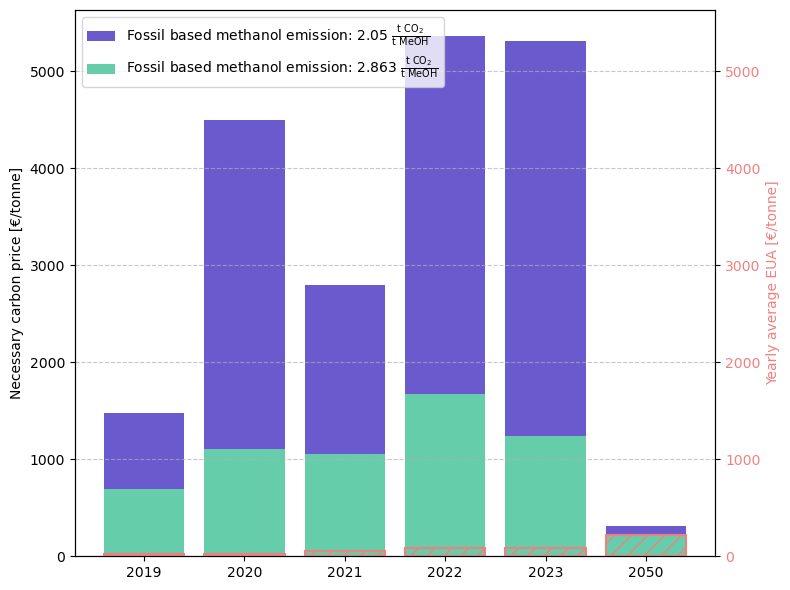

[24.723125, 24.38660287, 54.15156951, 80.18404545, 83.59650224, 221.0376]


In [24]:
# Bar positions
x_pos = np.arange(6)
EUAs = [avg_EUA_2019, avg_EUA_2020, avg_EUA_2021, avg_EUA_2022,avg_EUA_2023, EUA_2050_EUR]
# Plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot necessary carbon prices (stacked bars)
CP_lower = [CP2019l,CP2020l,CP2021l,CP2022l,CP2023l, CP2050l]
ax1.bar(x_pos, CP_lower, color='#6A5ACD', label=r'Fossil based methanol emission: 2.05 $\frac{\text{t CO}_2}{\text{t MeOH}}$')
ax1.bar(x_pos, [CP2019h,CP2020h,CP2021h,CP2022h,CP2023h, CP2050h], color='#66CDAA', label=r'Fossil based methanol emission: 2.863 $\frac{\text{t CO}_2}{\text{t MeOH}}$')


# Format primary y-axis
ax1.set_ylabel('Necessary carbon price [€/tonne]', color='black')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([2019, 2020, 2021, 2022, 2023, 2050])
ax1.grid(axis='y', linestyle='--', alpha=0.7)


ax2 = ax1.twinx()

# Plot yearly average EUA on secondary y-axis
ax2.bar(x_pos, EUAs, color='none', edgecolor='lightcoral', hatch='//', linewidth=1.5, label='Yearly average EUA')
# Format secondary y-axis
ax2.set_ylabel('Yearly average EUA [€/tonne]', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax1.legend()

y_min, y_max = ax1.get_ylim()
ax2.set_ylim(y_min, y_max)

# Set secondary y-axis ticks to match primary y-axis
#ax2.set_yticks(ax1.get_yticks())


plt.tight_layout()

# Show plot
plt.savefig("carbon_prices.png")
plt.show()


print(EUAs)

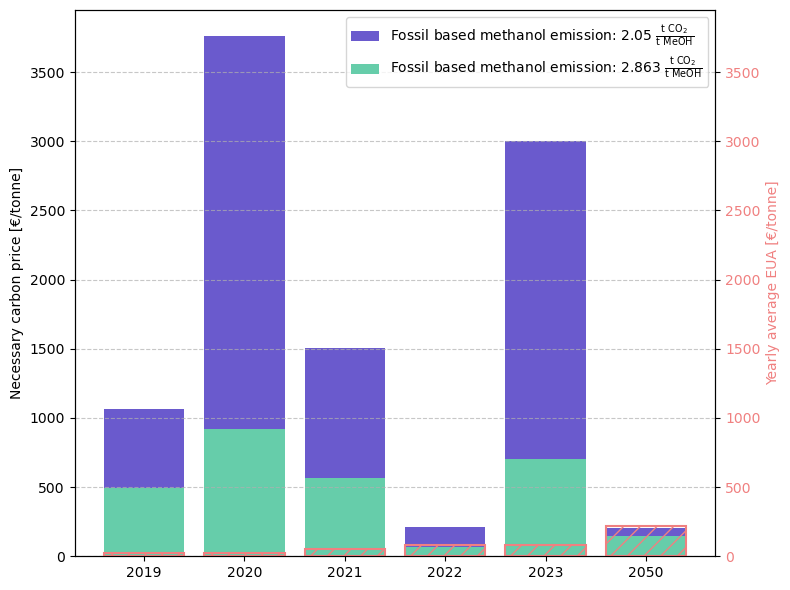

[24.723125, 24.38660287, 54.15156951, 80.18404545, 83.59650224, 221.0376]


In [26]:
# Bar positions
x_pos = np.arange(6)
EUAs = [avg_EUA_2019, avg_EUA_2020, avg_EUA_2021, avg_EUA_2022,avg_EUA_2023, EUA_2050_EUR]
# Plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot necessary carbon prices (stacked bars)
CP_lower = [CP2019l_PV,CP2020l_PV,CP2021l_PV,CP2022l_PV,CP2023l_PV, CP2050l_PV]
ax1.bar(x_pos, CP_lower, color='#6A5ACD', label=r'Fossil based methanol emission: 2.05 $\frac{\text{t CO}_2}{\text{t MeOH}}$')
ax1.bar(x_pos, [CP2019h_PV,CP2020h_PV,CP2021h_PV,CP2022h_PV,CP2023h_PV, CP2050h_PV], color='#66CDAA', label=r'Fossil based methanol emission: 2.863 $\frac{\text{t CO}_2}{\text{t MeOH}}$')


# Format primary y-axis
ax1.set_ylabel('Necessary carbon price [€/tonne]', color='black')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([2019, 2020, 2021, 2022, 2023, 2050])
ax1.grid(axis='y', linestyle='--', alpha=0.7)


ax2 = ax1.twinx()

# Plot yearly average EUA on secondary y-axis
ax2.bar(x_pos, EUAs, color='none', edgecolor='lightcoral', hatch='//', linewidth=1.5, label='Yearly average EUA')
# Format secondary y-axis
ax2.set_ylabel('Yearly average EUA [€/tonne]', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax1.legend()

y_min, y_max = ax1.get_ylim()
ax2.set_ylim(y_min, y_max)

# Set secondary y-axis ticks to match primary y-axis
#ax2.set_yticks(ax1.get_yticks())


plt.tight_layout()

# Show plot
plt.savefig("carbon_prices.png")
plt.show()


print(EUAs)

In [155]:
import matplotlib.colors as mcolors
print(mcolors.CSS4_COLORS)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

In [34]:
#export
with pd.ExcelWriter(output_file_name) as writer:
    df_values_without_PV.to_excel(writer, sheet_name='values_without_PV')
    df_values_with_PV.to_excel(writer, sheet_name='values_with_PV')